#  PENDETEKSI DEHIDRASI DENGAN METODE FUZZY LOGIC
### Nama : Ikhsan Nuh Atthalla 
### NIM    : 09011281722054
### Kelas : SK5B

<div class = "alert alert-success">
<b> ABSTRAK</b>:
    <li>Dehidrasi adalah kondisi dimana tubuh mengalami kehilangan 5% dari total 60% berat badan pada manusia umumnya, dehidrasi sering kali terjadi tanpa disadari oleh sebagian orang, dan beberapa diantaranya sering mengabaikan kondisi tersebut. Alat pendeteksi dehidrasi ini dibangun dengan memanfaatkan sensor LM35 sebagai pendeteksi suhu lingkungan, Termokopel sebagai pendeteksi suhu tubuh dan sensor GSR (Galvanic Skin Resistance) sebagai monitoring tekanan darah, serta arduino sebagai pusat pengendalian sistem. Dehidrasi akan dideteksi dengan membandingkan nilai dari inputan sensor. Data dari setiap sensor akan diolah dengan menggunakan metode fuzzy logic. data yang dihasilkan akan dikirim ke dalam smartphone android yang terhubung secara wireless melalui bluetooth. Dengan adanya alat pendeteksi diharapkan dapat memberikan informasi dan peringatan jika terdeteksi kondisi dehidrasi pada tubuh. </li>



In [1]:
import numpy as np #mengimport numpy untuk arange yang akan digunakan
import skfuzzy as fuzz # Mengimport fuzzy
from skfuzzy import control as ctrl #mengimport control untuk keperluan rule, controlsystem dan control system simulation

# Deklarasi

<div class = "alert alert-success">
$\begin{array}{ll}
       Suhu Lingkungan & \mbox{: } 28 \ °C \ - \ 38 \ °C \\
       Suhu Tubuh & \mbox{: } 33 \ °C \ - \ 40 \ °C \\
       Tekanan Darah & \mbox{: } 110 \ mmHg \ - \ 160 \ mmHg \\
       Kondisi & \mbox {: } 1 - 2
\end{array}$
</div>

In [2]:
SL = ctrl.Antecedent(np.arange(28,39,1),'Suhu Lingkungan') #deklarasi input suhu lingkungan dengan range dari 28 sampai 38 derajat, step nya 1
ST = ctrl.Antecedent(np.arange(33,41,1),'Suhu Tubuh') #deklarasi input suhu tubuh dengan range dari 33 sampai 40 derajat, step nya 1
TD = ctrl.Antecedent(np.arange(110,161,1),'Tekanan Darah') #deklarasi input tekanan darah dengan range dari 110 sampai 160, step nya 1
D = ctrl.Consequent(np.arange(1,2.1,0.1),'Kondisi') #deklarasi output Dehidrasi dengan range dari 0 sampai 1, step nya 0.1

# Suhu Lingkungan

<div class = "alert alert-info">
    <b>
        
### Keanggotaan </b>
<ul> 
$\begin{array}{ll}
       Normal & \mbox{: } 28 \ °C \ - \ 32 \ °C \\
       Hangat & \mbox{: } 30 \ °C \ - \ 36 \ °C \\
       Panas & \mbox{: } 34 \ °C \ - \ 38 \ °C
\end{array}$
</div>

C:\Users\DELL\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


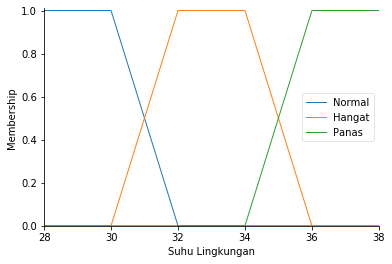

In [3]:
#Suhu Lingkungan, 3 keanggotaan (normal, hangat, panas) dengan bentuk trapesium semua.
SL['Normal'] = fuzz.trapmf(SL.universe,[28,28,30,32]) #Suhu Lingkungan keanggotaan normal berbentuk trapesium, dengan nilai kurva trapesium 0,0,30,32
SL['Hangat'] = fuzz.trapmf(SL.universe,[30,32,34,36]) #Suhu Lingkungan keanggotaan hangat berbentuk trapesium, dengan nilai kurva trapesium 30,32,34,36
SL['Panas'] = fuzz.trapmf(SL.universe,[34,36,38,38]) #Suhu Lingkungan keanggotaan panas berbentuk trapesium, dengan nilai kurva trapesium 34,36,39,38
SL.view() #menampilkan kurva suhu lingkungan

# Suhu Tubuh

<div class = "alert alert-info">
    <b>
        
### Keanggotaan </b>
<ul> 
$\begin{array}{ll}
       Normal & \mbox{: } 33 \ °C \ - \ 38 \ °C \\
       Panas & \mbox{: } 35 \ °C \ - \ 40 \ °C
\end{array}$
</div>

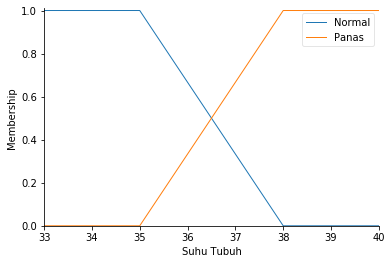

In [4]:
#Suhu Tubuh, 2 keanggotaan (normal, panas) dengan bentuk trapesium semua.
ST['Normal'] = fuzz.trapmf(ST.universe,[33,33,35,38]) #Suhu Tubuh keanggotaan normal berbentuk trapesium, dengan nilai kurva trapesium 0,0,35,38
ST['Panas'] = fuzz.trapmf(ST.universe,[35,38,40,40]) #Suhu Tubuh keanggotaan Panas berbentuk trapesium, dengan nilai kurva trapesium 35,38,40,40
ST.view() #menampilkan kurva Suhhu tubuh

# Tekanan Darah

<div class = "alert alert-info">
<b>
        
### Keanggotaan </b>
<ul> 
    $\begin{array}{ll}
       Rendah & \mbox{: } 110 \ °C \ - \ 130 \ °C \\
       Normal & \mbox{: } 120 \ °C \ - \ 150 \ °C \\
       Tinggi & \mbox{: } 140 \ °C \ - \ 160 \ °C
    \end{array}$
<ul>
</ul>
</div>

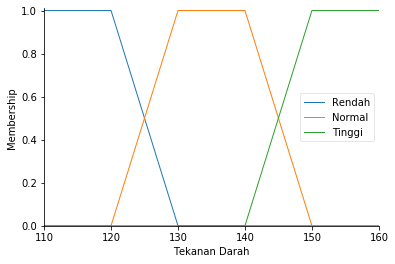

In [5]:
#Tekanan Darah, 3 keanggotaan (Rendah, normal, Tinggi) dengan bentuk trapesium semua.
TD['Rendah'] = fuzz.trapmf(TD.universe,[110,110,120,130]) #tekanan Darah keanggotaan rendah berbentuk trapesium, dengan nilai kurva trapesium 0,0,120,130
TD['Normal'] = fuzz.trapmf(TD.universe,[120,130,140,150]) #tekanan Darah keanggotaan normal berbentuk trapesium, dengan nilai kurva trapesium 120,130,140,150
TD['Tinggi'] = fuzz.trapmf(TD.universe,[140,150,160,160]) #tekanan Darah keanggotaan tinggi berbentuk trapesium, dengan nilai kurva trapesium 140,150,160,160
TD.view() #menampilkan kurva Tekanan darah

# Output : Kondisi (Dehidrasi / Tidak Dehidrasi)

<div class = "alert alert-info" >
<b>
        
### Keanggotaan </b>
<ul> 
    $\begin{array}{ll}
       Tidak Dehidrasi & \mbox{: } 1 \ - \ 1.6 \\
       Dehidrasi & \mbox{: } 1.4 \ - \ 2 
    \end{array}$
<ul>
</ul>
</div>

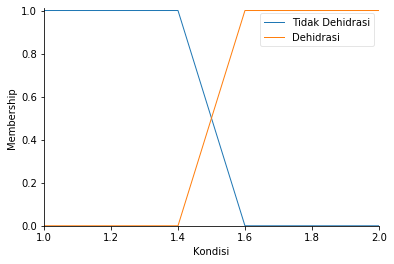

In [6]:
D['Tidak Dehidrasi'] = fuzz.trapmf(D.universe,[1,1,1.4,1.6]) #Dehidrasi keanggotaan Tidak Dehidrasi berbentuk trapesium, dengan nilai kurva trapesium 0,0,0.4,0.6
D['Dehidrasi'] = fuzz.trapmf(D.universe,[1.4,1.6,2,2.1]) #Dehidrasi keanggotaan Dehidrasi berbentuk trapesium, dengan nilai kurva trapesium 0.4,0.6,1,1
D.view() #menampilkan kurva Dehidrasi

# Rule

## 1. Rule Tabel :

Suhu Lingkungan | Suhu Tubuh | Tekanan Darah | Output
--- | --- | --- | ---
Normal | Normal | Rendah| Tidak Dehidrasi
Normal | Normal | Normal| Tidak Dehidrasi
Normal | Normal | Tinggi| Tidak Dehidrasi
Normal | Panas | Rendah| Dehidrasi
Normal | Panas | Normal| Dehidrasi
Normal | Panas | Tinggi| Tidak Dehidrasi
Hangat | Normal | Rendah| Dehidrasi
Hangat | Normal | Normal| Tidak Dehidrasi
Hangat | Normal | Tinggi| Tidak Dehidrasi
Hangat | Panas | Rendah| Dehidrasi
Hangat | Panas | Normal| Dehidrasi
Hangat | Panas | Tinggi| Tidak Dehidrasi
Panas | Normal | Rendah| Dehidrasi
Panas | Normal | Normal| Dehidrasi
Panas | Normal | Tinggi| Tidak Dehidrasi
Panas | Panas | Rendah| Dehidrasi
Panas | Panas | Normal| Dehidrasi
Panas | Panas | Tinggi| Dehidrasi

C:\Users\DELL\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\DELL\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1efb9fb4cc0>)

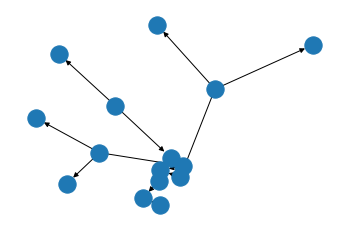

In [7]:
#membuat rule sehingga menghubungkan Antecedent ke Consequent

regra1 = ctrl.Rule(SL['Normal'] & ST['Normal'] & TD['Rendah'], D['Tidak Dehidrasi'])
regra2 = ctrl.Rule(SL['Normal'] & ST['Normal'] & TD['Normal'], D['Tidak Dehidrasi'])
regra3 = ctrl.Rule(SL['Normal'] & ST['Normal'] & TD['Tinggi'], D['Tidak Dehidrasi'])

regra4 = ctrl.Rule(SL['Normal'] & ST['Panas'] & TD['Rendah'], D['Dehidrasi'])
regra5 = ctrl.Rule(SL['Normal'] & ST['Panas'] & TD['Normal'], D['Dehidrasi'])
regra6 = ctrl.Rule(SL['Normal'] & ST['Panas'] & TD['Tinggi'], D['Tidak Dehidrasi'])

regra7 = ctrl.Rule(SL['Hangat'] & ST['Normal'] & TD['Rendah'], D['Dehidrasi'])
regra8 = ctrl.Rule(SL['Hangat'] & ST['Normal'] & TD['Normal'], D['Tidak Dehidrasi'])
regra9 = ctrl.Rule(SL['Hangat'] & ST['Normal'] & TD['Tinggi'], D['Tidak Dehidrasi'])

regra10 = ctrl.Rule(SL['Hangat'] & ST['Panas'] & TD['Rendah'], D['Dehidrasi'])
regra11 = ctrl.Rule(SL['Hangat'] & ST['Panas'] & TD['Normal'], D['Dehidrasi'])
regra12 = ctrl.Rule(SL['Hangat'] & ST['Panas'] & TD['Tinggi'], D['Tidak Dehidrasi'])

regra13 = ctrl.Rule(SL['Panas'] & ST['Normal'] & TD['Rendah'], D['Dehidrasi'])
regra14 = ctrl.Rule(SL['Panas'] & ST['Normal'] & TD['Normal'], D['Dehidrasi'])
regra15 = ctrl.Rule(SL['Panas'] & ST['Normal'] & TD['Tinggi'], D['Tidak Dehidrasi'])

regra16 = ctrl.Rule(SL['Panas'] & ST['Panas'] & TD['Rendah'], D['Dehidrasi'])
regra17 = ctrl.Rule(SL['Panas'] & ST['Panas'] & TD['Normal'], D['Dehidrasi'])
regra18 = ctrl.Rule(SL['Panas'] & ST['Panas'] & TD['Tinggi'], D['Dehidrasi'])

#bentuk plot salah satu rule yang dibuat yaitu regra1
regra1.view()

# Hitung Rule

In [8]:
#menggunakan control System untuk membuat base class dari rule dan menghitungnya menggunakan Control System simulation
tipping_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4,regra5,regra6,regra7,regra8,regra9,regra10,regra11,regra12,regra13,regra14,regra15,regra16,regra17,regra18])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

C:\Users\DELL\Anaconda3\lib\site-packages\skfuzzy\control\controlsystem.py:133: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


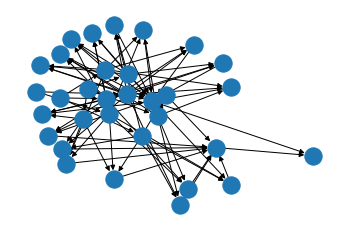

In [9]:
#bentuk plot hasil Control System semua rule
tipping_ctrl.view()

# Masukan Input

In [10]:
tipping.input['Suhu Lingkungan'] = 35 #memasukan input suhu lingkungan dengan nilai 35
tipping.input['Suhu Tubuh'] = 36.5 #memasukan input suhu tubuh dengan nilai 36.5
tipping.input['Tekanan Darah'] = 140 #memasukan input tekanan darah dengan nilai 140

<div class = "alert alert-info">
<ul>
    <li>$ µTrapesium = 
\left\{
    \begin{array}{ll}
       0 & \mbox{; } x \leq a,OR,x \geq d \\
       {x-a \over b-a} & \mbox{; } a <x < b \\
       1 & \mbox{; }b \leq x \leq c\\
       {d-x \over d-c} & \mbox {;} c < x < d\\ 
    \end{array}
\right.$</li>
</ul>
</div>


### Perhitungan Input Suhu Lingkungan :

<div class = "alert alert-warning">
Diketahui:  
   $x=35 \\   
    a=34,\ \ c=34\\  
    b=36,\ \ d=36$      
    
$Karena \\
Hangat : c < x < d \\ 
Panas  : a < x < b \\ $
<div>
$maka \\   
µ Hangat[35] = 
\left\{
    \begin{array}{ll}
       {d-x \over d-c}={36-35 \over 36-34} = {1 \over 2} = 0.5
    \end{array}
\right.$

$ µ Panas[35] = 
\left\{
    \begin{array}{ll}
       {x-a \over b-a}={35-34 \over 36-34} = {1 \over 2} = 0.5
    \end{array}
\right.$
</div>

### Perhitungan Input Suhu Tubuh :

<div class = "alert alert-warning">
<div>
Diketahui:  
   $x=36.5 \\    
    a=35,\ \ c=35 \\   
    b=38,\ \ d=38 $
    
$Karena \\
Normal : c < x < d \\
Panas  : a < x < b \\ $
<div>
$maka \\         
µ Normal[36.5] = 
\left\{
    \begin{array}{ll}
       {d-x \over d-c}={38-36.5 \over 38-35} = {1.5 \over 3} = 0.5
    \end{array}
\right.$

$ µ Panas[36.5] = 
\left\{
    \begin{array}{ll}
       {x-a \over b-a}={36.5-35 \over 38-35} = {1.5 \over 3} = 0.5
    \end{array}
\right.$
</div>

### Perhitungan  Input Tekanan Darah :

<div class = "alert alert-warning">
Diketahui:  
   $x=140 \\    
    a=140, \ \ c=150 \\  
    b=140, \ \ d=150 $
    
$Karena \\
Tinggi : x \leq a,OR,x \geq d \\
Normal : b\leq x \leq c \\ $

$maka \\  
µTinggi[35] = 0 \\
µNormal[35] = 1$
</div>

# Output

<div class="alert alert-warning">
    
### Defuzifikasi
<ul> Ada beberapa metode defuzzufukasi pada komposisi aturan 'MAMDANI', disini saya menggunakan Metode Centroid </ul>                    
    <ul>Metode centroid (Composite Moment), pada metode ini, solusi crisp diperoleh dengan cara mengambil titik pusta daerah fuzzy. secara umum dirumuskan sebagai berikut :
    
## $ Z = {Σ_{i=1}^n \ Z_i \ x \ X_i \over Σ_{i=1}^n X_i} \\ $</ul>

misalkan $Z_i$ adalah pusat himpunan fuzzy ke i dan $X_i$ adalah tingginya

    
## Mencari $Σ_{i=1}^n \ Z_i x X_i$
<div class="alert alert-warning ">
    
#### $ Σ_{i=1}^n \ Z_i \ x \ X_i = Σ_{i=1}^n \ Zi \ x \ X_i \ [Tidak Dehidrasi] + Σ_{i=1}^n \ Zi \ x \ X_i \ [Dehidrasi] \\ $
#### $ Σ_{i=1}^n \ Z_i \ x \ X_i = {((1 \ x \ 0.5) \ + \ (1.1 \ x \ 0.5) \ + \ (1.2 \ x \ 0.5) \ + \ (1.3 \ x \ 0.5) \ + \ (1.4 \ x \ 0.5) \ + \ (1.5 \ x \ 0.5) \ + \ (1.6 \ x \ 0) \ + \ ((1.4 \ x \ 0) \ + \ (1.5 \ x \ 0.5) \ + \ (1.6 \ x \ 0.5) \ + \ (1.7 \ x \ 0.5) \ + \ (1.8 \ x \ 0.5) \ + \ (1.9 \ x \ 0.5) \ + \ (2 \ x \ 0.5))} \\ $ 
#### $ Σ_{i=1}^n \ Z_i \ x \ X_i = 3.75 \ + \ 5.25 = 9 \\ $
</div>

## Mencari $ Σ_{i=1}^n \ A_i $
<div class="alert alert-warning ">

#### $ Σ_{i=1}^n \ X_i = Σ_{i=1}^n \ X_i \ [Tidak Dehidrasi] + Σ_{i=1}^n \ X_i \ [Dehidrasi] \\ $
#### $ Σ_{i=1}^n \ A_i = {(0.5 \ + \ 0.5 \ + \ 0.5 \ + \ 0.5 \ + \ 0.5 \ + \ 0.5 \ + \ 0) + (0\ + \ 0.5 \ + \ 0.5 \ + \ 0.5 \ + \ 0.5 \ + \ 0.5 \ + \ 0.5)}\\ $  
#### $ Σ_{i=1}^n \ A_i = 3 + 3 = 6 \\ $
</div>

## Centroid
<div class="alert alert-warning">
  
### $ Centroid = {Σ_{i=1}^n \ Z_i \ x \ X_i \over Σ_{i=1}^n X_i} \\ \\ $
### $ Centroid = { 9 \over 6} = 1.5 $
Didapatlah nilai centroid nya yang bernilai 1.5

In [11]:
tipping.compute() #menghitung input yang sudah dimasukan
print(tipping.output['Kondisi']) # menampilkan hasil hitungan 

1.5000000000000004


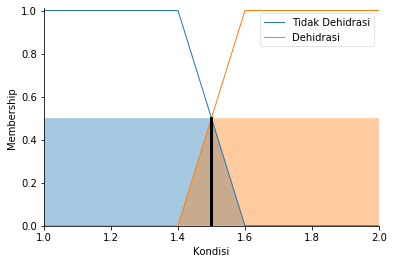

In [12]:
#menampilkan serta memvisualisasikan output yang didapat
tipping.output['Kondisi']
D.view(sim=tipping) 